## Titanic Survival 

The goal is to predict survival on the Titanic.  

10/25/2020

---

In [1]:
# Import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import dataset

os.chdir('//Users/mareksturek/Documents/GitHub/kaggle-competition/data')
dataset = pd.read_csv('titanictrain.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Overall info about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Before I start the data analysis section, here are some of the questions to be answered. 

- Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)
- Who was alone and who was with family?
- What helped someone survive the sinking?

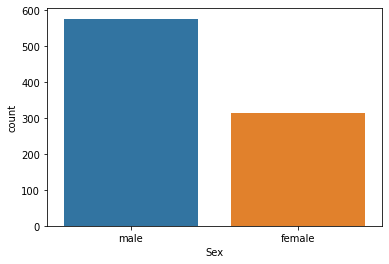

In [4]:
# Exploratory data analysis

# Gender check 
sns.countplot(x = 'Sex', data = dataset);

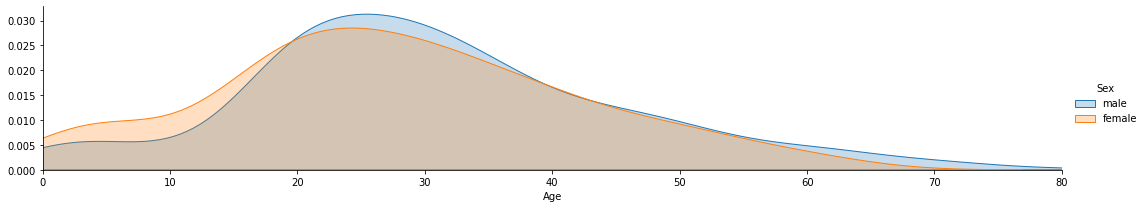

In [5]:
# Gender check with FaceGrid

fig = sns.FacetGrid(dataset, hue="Sex",aspect=5)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = dataset['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [6]:
# Create function to sort through the sex and identify anyone under age of 16 as a child

def male_female_child(passenger):
   
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    

# Create new column called 'person'

dataset['Person'] = dataset[['Age','Sex']].apply(male_female_child,axis=1)
dataset[5:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


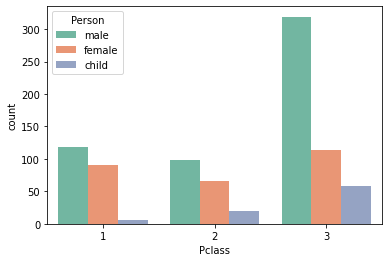

In [7]:
# Gender separted by class in Person column 

sns.countplot(x = 'Pclass', hue = 'Person', palette = 'Set2', data = dataset);

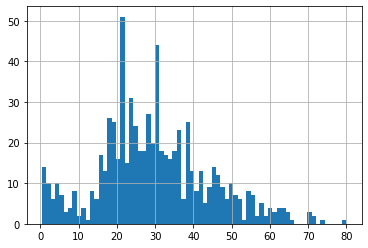

In [8]:
# Age histogram quickly

dataset['Age'].hist(bins=70);

In [9]:
# Overall count in numbers 

dataset['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [10]:
# Create column "HowMany" based on "SibSp" if  >0 or ==0 

dataset['HowMany'] =  dataset.Parch + dataset.SibSp
dataset['HowMany'].loc[dataset['HowMany'] >0] = 'With Family'
dataset['HowMany'].loc[dataset['HowMany'] == 0] = 'Alone'
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,HowMany
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


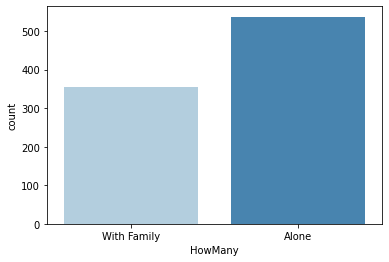

In [11]:
# Check whether with family or alone 

sns.countplot(x = 'HowMany', data = dataset, palette = 'Blues');

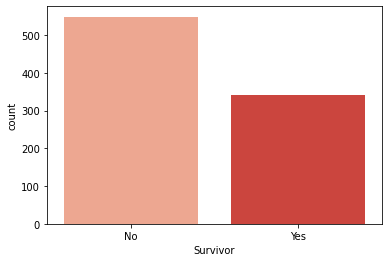

In [12]:
# Check Survivors 

dataset["Survivor"] = dataset.Survived.map({0: "No", 1: "Yes"})
sns.countplot(x = 'Survivor', data = dataset, palette = 'Reds');

In [13]:
# Data pre-processing

train_df = pd.read_csv('titanictrain.csv', header=0) 

# Convert all strings to integer classifiers; female = 0, Male = 1
train_df['Gender'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# All missing Embarked
if len(train_df.Embarked[ train_df.Embarked.isnull() ]) > 0:
    train_df.Embarked[ train_df.Embarked.isnull() ] = train_df.Embarked.dropna().mode().values
    
Ports = list(enumerate(np.unique(train_df['Embarked'])))    # determine all values of Embarked,
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
train_df.Embarked = train_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)   # Convert all Embark strings to int


# All the ages with no data, make the median of all ages
median_age = train_df['Age'].dropna().median()
if len(train_df.Age[ train_df.Age.isnull() ]) > 0:
    train_df.loc[ (train_df.Age.isnull()), 'Age'] = median_age
    
    
# Remove the Name column, Cabin, Ticket, and Sex 
train_df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1) 

In [14]:
# Test data pre-processing

test_df = pd.read_csv('titanictest.csv', header=0) 

# Convert all strings to integer classifiers; female = 0, Male = 1
test_df['Gender'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# All missing Embarked 
if len(test_df.Embarked[ test_df.Embarked.isnull() ]) > 0:
    test_df.Embarked[ test_df.Embarked.isnull() ] = test_df.Embarked.dropna().mode().values
    
# Convert all Embarked strings to int
test_df.Embarked = test_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)

# All the ages with no data, make the median of all Ages
median_age = test_df['Age'].dropna().median()
if len(test_df.Age[ test_df.Age.isnull() ]) > 0:
    test_df.loc[ (test_df.Age.isnull()), 'Age'] = median_age
    
# All the missing Fares, assume median of their respective class
if len(test_df.Fare[ test_df.Fare.isnull() ]) > 0:
    median_fare = np.zeros(3)
    for f in range(0,3):                                             
        median_fare[f] = test_df[ test_df.Pclass == f+1 ]['Fare'].dropna().median()
    for f in range(0,3):                                            
        test_df.loc[ (test_df.Fare.isnull()) & (test_df.Pclass == f+1 ), 'Fare'] = median_fare[f]
        
# Collect the test data's PassengerIds before dropping it
ids = test_df['PassengerId'].values

# Remove the Name column, Cabin, Ticket, and Sex 
test_df = test_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1) 

In [15]:
# Convert train & test dataframes back to a numpy array

train_data = train_df.values
test_data = test_df.values

In [16]:
# RandomForest training 

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit( train_data[0::,1::], train_data[0::,0] )
forest

RandomForestClassifier()

In [17]:
# RandomForest predicting 

output = forest.predict(test_data).astype(int)
output

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
# Document results in csv

predictions_file = open("titanicresults.csv", "w")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()

In [19]:
results = pd.read_csv('titanicresults.csv', header=0) 
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
